**MOUTH  IMAGE CLASSIFICATION**

Machine learning is a field of study and is concerned with algorithms that learn from examples.

There are three types of machine learning, and they are:

*   Supervised Learning *where machine learning algorithm is trained on labeled data.*
*   Unsupervised Learning *where machine learning algorithm is trained to work without labeled data.*
*   Reinforced Learning *where the machine learning algorithm is trained to work bosed on a reward system.*


*Please instead of explaining classification,ease explain image classification*

Classification is a task that requires the use of machine learning algorithms that learn how to assign a class label to examples from the problem domain. An easy to understand example is classifying emails as “spam” or “not spam.”

For this particular classification problem, because the dataset used had no labels, unsupervised learning was used to carry out the classification.

**The Dataset**

The dataset used for this classification was culled from https://www.kaggle.com/kmader/siim-medical-images?select=full_archive.npz and uploaded to google drive. The cell below indicates how the dataset was connected from google drive to colab.

In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import os
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

the size of the data is 512 pixel hieght and 512 pixel width
the minimum pixel value is 0.0
the maximum pixel value is 1.0
the mean pixel value is 0.1183705498190487
the standard deviation pixel value is 0.11436137879974076


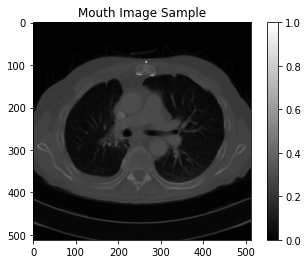

In [4]:
sample_mouth_image = imread(r'/content/gdrive/My Drive/KAGGLE DATASET/MOUTH DATASET/image (7).png', as_gray= True)
plt.imshow(sample_mouth_image, cmap=cm.gray)
plt.colorbar()
plt.title('Mouth Image Sample')
print(f"the size of the data is {sample_mouth_image.shape[0]} pixel hieght and {sample_mouth_image.shape[1]} pixel width")
print(f"the minimum pixel value is {sample_mouth_image.min()}")
print(f"the maximum pixel value is {sample_mouth_image.max()}")
print(f"the mean pixel value is {sample_mouth_image.mean()}")
print(f"the standard deviation pixel value is {sample_mouth_image.std()}")

plt.show()

In [5]:
sample_mouth_image.shape

(512, 512)

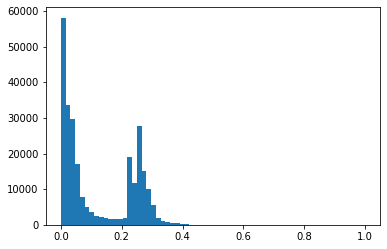

In [6]:
plt.hist(sample_mouth_image.ravel(),64,[0,1])
plt.show()

In [7]:
image_size = 512
def get_data(data_dir):
    data = []
    for img in os.listdir(data_dir):
        try:
            img_arr = imread(os.path.join(data_dir,img),as_gray=True)
            resized_arr = resize(img_arr,(image_size,image_size))
            data.append([img_arr])
        except Exception as e:
            print(e)
                
    return np.array(data)

In [8]:
mouth_image_features = get_data(r'/content/gdrive/My Drive/KAGGLE DATASET/MOUTH DATASET')
mouth_image_features.shape

(454, 1, 512, 512)

In [9]:
mouth_image_features.shape

(454, 1, 512, 512)

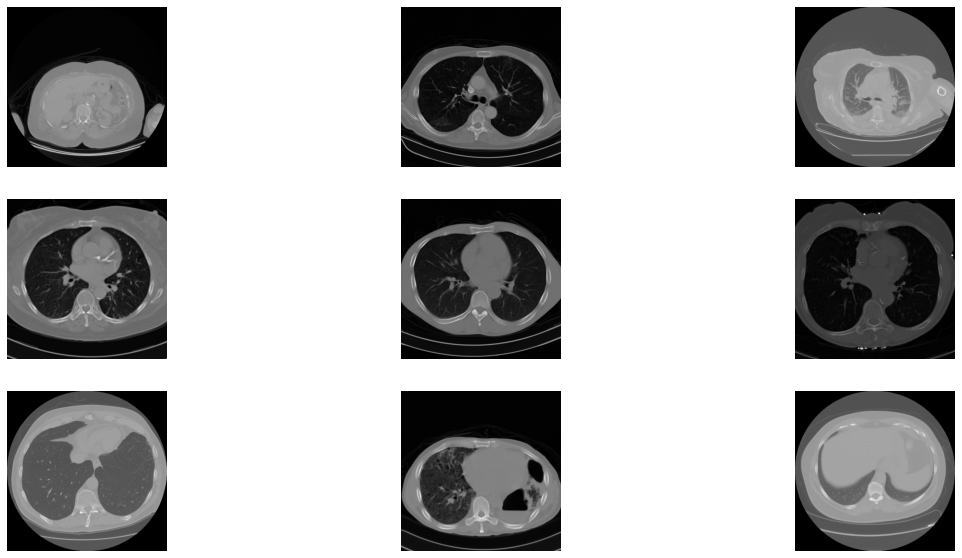

In [10]:
plt.figure(figsize=(20,10))

for i in range(9):
    num = np.random.randint(0, len(mouth_image_features)-1)
    plt.subplot(3,3,i+1)
    plt.imshow(mouth_image_features[num].reshape(mouth_image_features.shape[2],mouth_image_features.shape[3]), cmap='gray')
    plt.axis('off')

**Data Preparation**

This is the process of making the image dataset ready in such a way that it is easy for KMeans morel to associate pattern in the images. In order for KMeans to understand patterns in the image dataset,the features (pixels) extracted from the image dataset is first divided by 255 to scale the feature and then resized from 4D to 2D

In [11]:
mouth_image_features =  mouth_image_features/255.0
mouth_reshaped_feat = mouth_image_features.reshape(len(mouth_image_features),-1)
print(mouth_reshaped_feat.shape)

(454, 262144)


In [12]:
mouth_reshaped_feat

array([[4.61361015e-05, 1.53787005e-05, 0.00000000e+00, ...,
        1.23029604e-04, 4.61361015e-05, 1.53787005e-05],
       [1.53787005e-05, 1.53787005e-05, 1.53787005e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.15148020e-05, 0.00000000e+00, 7.68935025e-05, ...,
        4.61361015e-05, 4.61361015e-05, 3.07574010e-05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.38408304e-04, 6.15148020e-05, 9.22722030e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

**Spectral clustering**

Spectral clustering is an Exploratory Data Analysis technique that reduces complex multidimensional datasets into clusters of similar data in rarer dimensions. 

The main outline is to cluster the all spectrum of unorganized data points into multiple groups based upon their uniqueness. Spectral clustering is one of the most popular forms of multivariate statistical analysis. Spectral Clustering uses the connectivity approach to clustering, wherein communities of nodes (i.e. data points) that are connected or immediately next to each other are identified in a graph. 

The nodes are then mapped to a low-dimensional space that can be easily segregated to form clusters. Spectral Clustering uses information from the eigenvalues (spectrum) of special matrices (i.e. Affinity Matrix, Degree Matrix and Laplacian Matrix) derived from the graph or the data set.

Spectral clustering methods are attractive, easy to implement, reasonably fast especially for sparse data sets up to several thousand. Spectral clustering treats the data clustering as a graph partitioning problem without making any assumption on the form of the data clusters.

In [13]:
def run_spec_clus(n):
    spec= SpectralClustering(n_clusters=n, random_state=101)
    clusters = spec.fit_predict(mouth_reshaped_feat)
    print(f"The sil score for {n} cluster is {silhouette_score(mouth_reshaped_feat,clusters)}")

In [14]:
run_spec_clus(2)
run_spec_clus(3)
run_spec_clus(4)
run_spec_clus(5)
run_spec_clus(6)
run_spec_clus(7)

The sil score for 2 cluster is 0.2772207773620675
The sil score for 3 cluster is 0.17572851024775074
The sil score for 4 cluster is 0.1589839066437926
The sil score for 5 cluster is 0.17562989030128293
The sil score for 6 cluster is 0.09759730262771588
The sil score for 7 cluster is 0.09995454046443737


In [15]:
spec= SpectralClustering(n_clusters=7, random_state=101)

In [16]:
clusters = spec.fit_predict(mouth_reshaped_feat)

**Silhouette Coefficient**

Silhouette Coefficient or Silhouette Score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

The following steps can be applied to calculate the sihouette coefficient of a single sample in our dataset:
*1. Calculate the cluster cohesion $${a^{(i)}}$$ as the average distance between a sample $${x^{(i)}}$$ and all other points in the same cluster

*2 calculate the cluster separation $${b^{(i)}}$$ from the next closest cluster as the average distance between the sample $${x^{(i)}}$$ and all samples in the nearest cluster.

*3 Calculate the silhouette $${s^{(i)}}$$ as the difference between cluster cohesion and separation divided by the greater of the two as shown below:

Mathematical expression

$$s = \frac{b^{(i)} - a^{(i)}}{max{[b^{(i)},a^{(j)}]}}$$

In [17]:
silhouette_score(mouth_reshaped_feat,clusters)

0.09995454046443737

In [18]:
clusters

array([3, 3, 1, 3, 3, 0, 3, 3, 0, 0, 0, 3, 6, 3, 3, 1, 5, 6, 5, 5, 0, 0,
       6, 3, 0, 5, 0, 0, 5, 6, 0, 0, 0, 5, 6, 3, 6, 1, 6, 5, 6, 1, 5, 6,
       0, 5, 0, 3, 0, 5, 1, 0, 3, 6, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 0, 3,
       3, 0, 0, 1, 3, 5, 0, 0, 3, 1, 0, 3, 3, 6, 0, 3, 1, 1, 3, 0, 0, 3,
       1, 3, 3, 3, 1, 1, 5, 1, 3, 0, 3, 5, 0, 3, 1, 1, 3, 3, 1, 3, 1, 3,
       3, 3, 1, 3, 5, 3, 5, 3, 0, 6, 3, 5, 3, 5, 6, 3, 3, 2, 3, 3, 6, 2,
       2, 5, 1, 0, 1, 3, 3, 2, 5, 2, 0, 3, 3, 3, 0, 5, 1, 0, 3, 0, 3, 3,
       0, 0, 2, 0, 0, 2, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 5, 1,
       2, 1, 1, 3, 2, 3, 3, 3, 3, 1, 2, 2, 1, 5, 3, 1, 4, 4, 4, 2, 4, 5,
       4, 1, 4, 4, 4, 1, 5, 1, 4, 4, 1, 5, 1, 5, 1, 5, 1, 1, 4, 4, 5, 5,
       5, 5, 1, 1, 4, 1, 5, 5, 5, 5, 5, 1, 5, 1, 6, 5, 1, 1, 1, 4, 5, 5,
       1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 5, 1, 1, 5, 1, 5, 5, 1, 1,
       1, 3, 1, 1, 3, 1, 0, 2, 0, 3, 0, 3, 3, 2, 2, 5, 5, 5, 1, 1, 1, 1,
       3, 1, 1, 1, 3, 1, 4, 1, 2, 2, 2, 3, 5, 5, 4,

In [19]:
g = len(np.unique(clusters))

cluster_index =[[] for i in range(g)]

for i,label in enumerate(clusters,0):
    for n in range(g):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue
            
           
            

def visualize_cluster(clust_num,num_to_view):       
    #plt.figure(figsize=(20,10))
    clust = clust_num

    num = num_to_view
    for i in range(num):
        #plt.subplot(3,3,i+1)
        plt.imshow(mouth_reshaped_feat[cluster_index[clust][i]].reshape(mouth_image_features.shape[2],mouth_image_features.shape[3]),cmap=cm.gray) 
        plt.show()

In [20]:
print(cluster_index)

[[5, 8, 9, 10, 20, 21, 24, 26, 27, 30, 31, 32, 44, 46, 48, 51, 62, 64, 67, 68, 72, 73, 76, 80, 85, 86, 97, 100, 118, 135, 142, 146, 149, 151, 154, 155, 157, 158, 270, 272, 274, 397, 401, 402, 416, 425, 432, 434, 436, 440, 442, 444, 445, 449], [2, 15, 37, 41, 50, 61, 69, 75, 82, 83, 88, 92, 93, 95, 102, 103, 106, 108, 112, 134, 136, 148, 163, 167, 175, 177, 178, 185, 188, 191, 199, 203, 205, 208, 210, 212, 214, 215, 222, 223, 225, 231, 233, 236, 237, 238, 242, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 256, 257, 259, 262, 263, 264, 266, 267, 269, 282, 283, 284, 285, 287, 288, 289, 291, 293, 301, 304, 305, 306, 308, 309, 310, 311, 312, 315, 316, 318, 319, 320, 324, 332, 334, 336, 339, 341, 343, 346, 347, 348, 349, 350, 351, 352, 353, 355, 358, 366, 368, 371, 372, 373, 374, 375, 376, 377, 383, 384, 399, 405, 413, 422, 423, 435], [127, 131, 132, 139, 141, 156, 159, 176, 180, 186, 187, 195, 271, 277, 278, 294, 295, 296, 326, 327, 329, 330, 337, 338, 396, 400, 427, 429, 433, 453], [0,

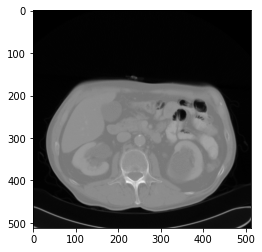

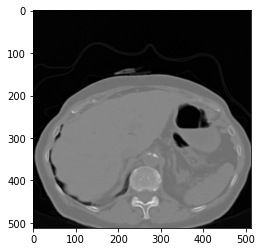

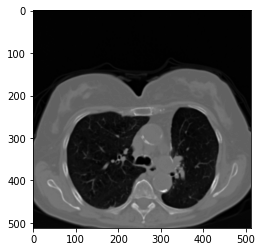

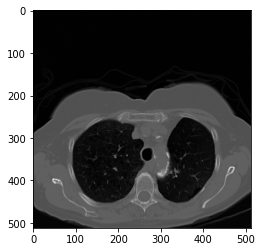

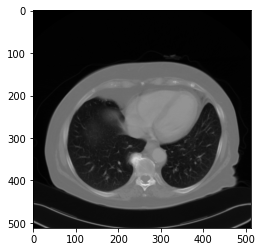

In [21]:
#view cluster 0
visualize_cluster(0,5)

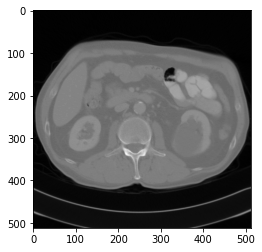

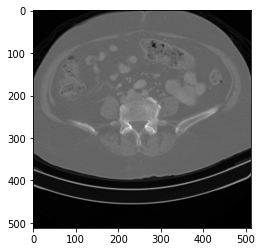

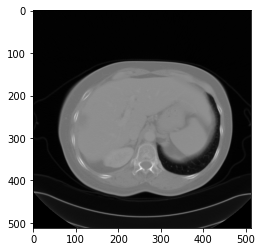

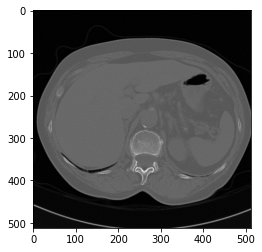

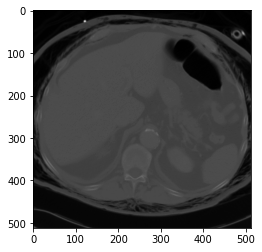

In [22]:
#view cluster 1
visualize_cluster(1,5)

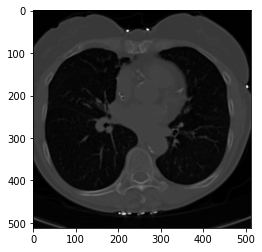

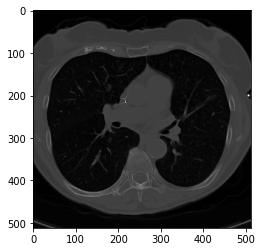

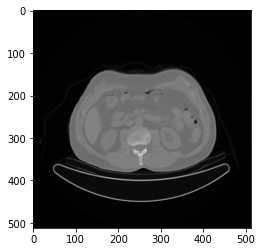

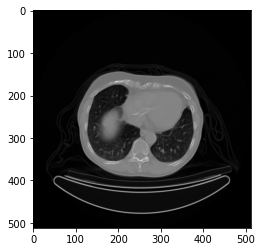

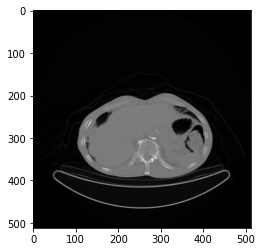

In [23]:
#view cluster 2
visualize_cluster(2,5)

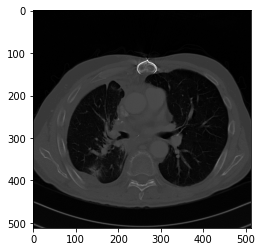

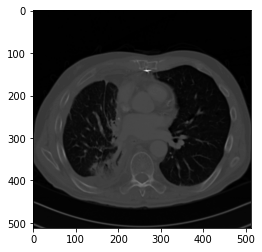

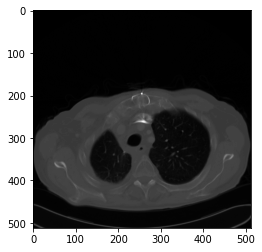

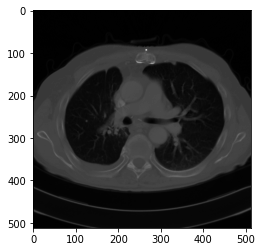

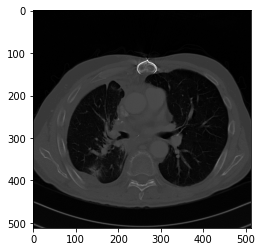

In [24]:
#view cluster 3
visualize_cluster(3,5)

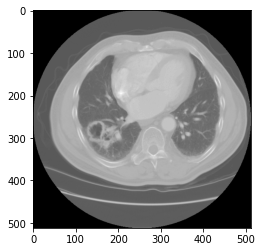

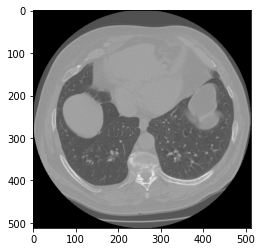

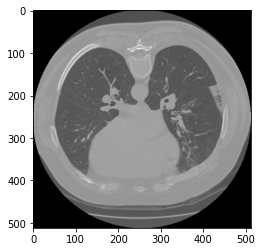

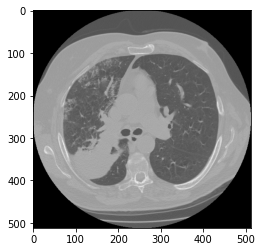

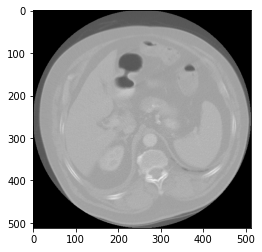

In [25]:
#view cluster 4
visualize_cluster(4,5)

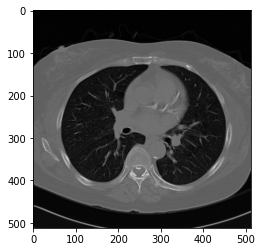

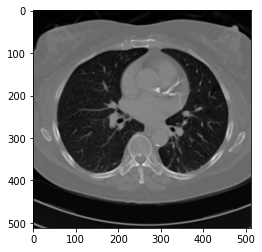

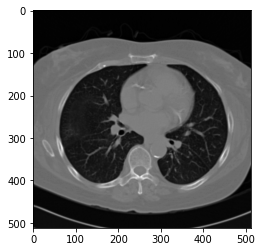

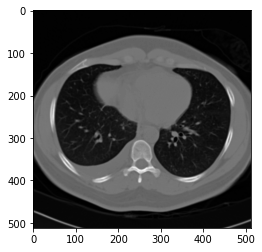

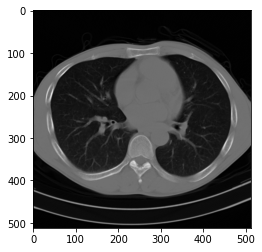

In [26]:
#view cluster 5
visualize_cluster(5,5)

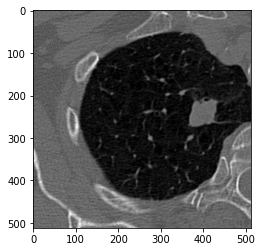

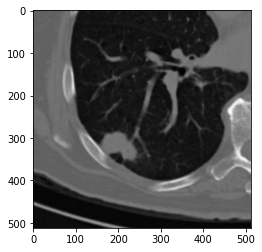

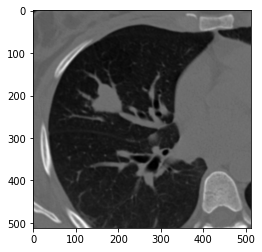

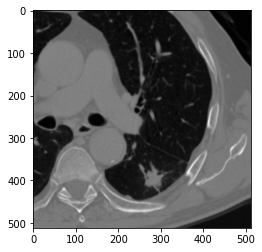

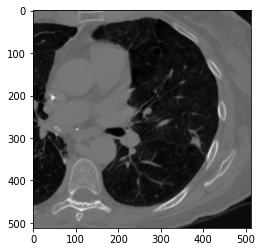

In [27]:
#view cluster 6
visualize_cluster(6,5)

From the visuals above, it can be seen that Spectral Clustering classifies;


*   cluster 0 as Anal Cancer,
*   cluster 1 as Bowel Cancer,
*   cluster 2 as
*   cluster 3 as
*   cluster 4 as Intestine Obstruction,
*   cluster 5 as
*   cluster 6 as




